Chapter 16  
# Gaussian Naive Bayes  
*Machine Learning Made Easy and Visual with Python*

## Initialization

In [3]:
import numpy as np  # Import NumPy for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for enhanced plotting
from matplotlib.colors import ListedColormap  # For creating custom color maps
from sklearn import datasets  # Import datasets module from scikit-learn
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes classifier

## Load Iris Dataset

In [5]:
iris = datasets.load_iris()  # Load the Iris dataset from scikit-learn

# Use only the first two features: sepal length and sepal width
X = iris.data[:, 0:2]  # Select first two features
y = iris.target  # Extract target labels

## Generate Grid for Visualization

In [7]:
h = 0.02  # Step size for the mesh grid
x1_min, x1_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2  # Define min and max for feature 1
x2_min, x2_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2  # Define min and max for feature 2
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))  # Create mesh grid

## Create Custom Color Maps

In [9]:
# Light colors for background regions
rgb = [[255, 238, 255],  # Light red
       [219, 238, 244],  # Light blue
       [228, 228, 228]]  # Light gray
rgb = np.array(rgb) / 255.  # Normalize RGB values to [0, 1]

cmap_light = ListedColormap(rgb)  # Background color map

In [10]:
# Bold colors for actual data points and decision boundaries
cmap_bold = [[255, 51, 0], [0, 153, 255], [138, 138, 138]]  # Red, Blue, Gray
cmap_bold = np.array(cmap_bold) / 255.  # Normalize

## Gaussian Naive Bayes Classifier

In [12]:
gnb = GaussianNB()  # Instantiate Gaussian Naive Bayes classifier

## Fit Model to Data

In [14]:
gnb.fit(X, y)  # Train the model using features X and labels y

GaussianNB()

## Prediction over Grid Points

In [16]:
q = np.c_[xx1.ravel(), xx2.ravel()]  # Flatten grid to create query points
y_predict = gnb.predict(q)  # Predict class labels for each grid point
y_predict = y_predict.reshape(xx1.shape)  # Reshape predictions back to grid shape

## Visualization

(4.1, 8.079999999999915, 1.8, 4.600000000000002)

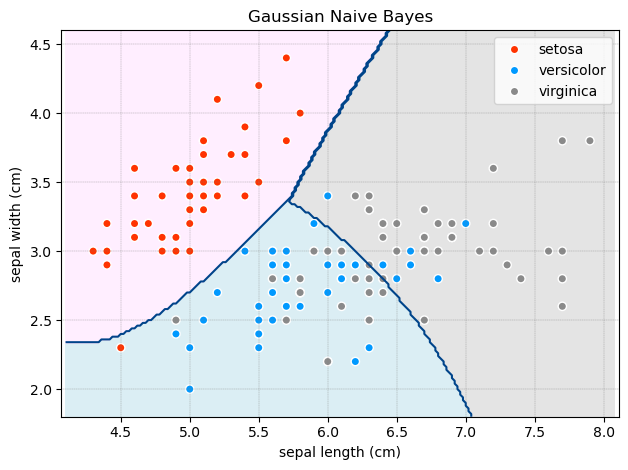

In [18]:
fig, ax = plt.subplots()  # Create figure and axes

## Plot Decision Regions
plt.contourf(xx1, xx2, y_predict, cmap=cmap_light)  # Fill decision regions with colors

## Plot Decision Boundaries
plt.contour(xx1, xx2, y_predict, levels=[0, 1, 2], colors=np.array([0, 68, 138]) / 255.)  # Draw decision boundaries

## Plot Data Points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],  # Map labels to target names
                palette=cmap_bold.tolist(), alpha=1.0,  # Use bold colors, set transparency
                linewidth=1, edgecolor=[1, 1, 1])  # Set edge color and line width

## Plot Settings
plt.xlim(xx1.min(), xx1.max())  # Set x-axis limits
plt.ylim(xx2.min(), xx2.max())  # Set y-axis limits
plt.title("Gaussian Naive Bayes")  # Set plot title
plt.xlabel(iris.feature_names[0])  # Set x-axis label
plt.ylabel(iris.feature_names[1])  # Set y-axis label
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # Add light grid lines
plt.tight_layout()  # Adjust spacing
plt.axis('equal')  # Equal aspect ratio for x and y axes